In [38]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from scipy import signal

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
    
# Split the data into input and target variables
X_train = torch.tensor(train_data.drop(['id', 'y'], axis=1).values, dtype=torch.float32)
y_train = torch.tensor(train_data['y'].values, dtype=torch.float32)
X_test = torch.tensor(test_data.drop('id', axis=1).values, dtype=torch.float32)



# y_train = torch.tensor(signal.medfilt(y_train))
# y_train = torch.tensor(np.convolve(y_train, np.ones(10)/10, mode='same'), dtype=torch.float32)

# Normalize the input features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Calculate the z-scores of the data
mean = torch.mean(X_train, dim=0)
std = torch.std(X_train, dim=0)
z_scores = (X_train - mean) / std

# Identify the indices of the outliers
outlier_indices = torch.where(torch.abs(z_scores) > 3)

# Remove the outliers from the dataset
X_train = torch.tensor(np.delete(X_train.numpy(), outlier_indices[0], axis=0), dtype=torch.float32)
y_train = torch.tensor(np.delete(y_train.numpy(), outlier_indices[0]), dtype=torch.float32)


# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(X_train.shape[1], 128)
        self.l2 = nn.Linear(128, 10)
        self.l3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x


model = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
# optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

# learning_rate,num_epochs    = 0.0001,100
# # model                       = func_simulator()
# loss                        = nn.MSELoss()
# gradient                    = torch.optim.SGD(model.parameters(),lr=learning_rate)

# Train the model
for epoch in range(200):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train.unsqueeze(1))
    loss.backward(retain_graph=True)
    optimizer.step()
    if(epoch+1)%10==0:
        print(f'epoch:{epoch+1},loss={loss.item():.3f}')

# for epoch in range(num_epochs):
#     y_pred = model.forward(X_train)
#     l = loss(y_pred,y_train)
#     l.backward()
#     gradient.step()
#     gradient.zero_grad()

#     if(epoch+1)%10==0:
#         print(f'epoch:{epoch+1},loss={l.item():.3f}')

# Evaluate the model
# with torch.no_grad():
#     y_pred = model(X_test)
#     loss = criterion(y_pred, y_test.unsqueeze(1))
#     mae = nn.L1Loss()(y_pred, y_test.unsqueeze(1))
#     print('Test loss:', loss.item())
#     print('Test MAE:', mae.item())
    
# Make predictions on the test data
with torch.no_grad():
    y = model(X_test).squeeze(1).numpy()

# Add the predictions to the test data DataFrame
# test_data['y_pred'] = y_pred
cols = ['id', 'y']
y_pred = pd.DataFrame({'y': y})
y_pred.index = np.arange(1, len(y_pred)+1)
y_pred.index.name = 'id'


# Save the predictions to a CSV file
y_pred.to_csv('predictions.csv', index=True)

# Save the model
# torch.save(model.state_dict(), 'my_model.pt')


epoch:10,loss=0.775
epoch:20,loss=0.229
epoch:30,loss=0.197
epoch:40,loss=0.156
epoch:50,loss=0.139
epoch:60,loss=0.129
epoch:70,loss=0.124
epoch:80,loss=0.120
epoch:90,loss=0.118
epoch:100,loss=0.117
epoch:110,loss=0.115
epoch:120,loss=0.113
epoch:130,loss=0.112
epoch:140,loss=0.111
epoch:150,loss=0.110
epoch:160,loss=0.109
epoch:170,loss=0.108
epoch:180,loss=0.106
epoch:190,loss=0.105
epoch:200,loss=0.104


<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [11]:
learning_rate_list = [lr/2000 for lr in range(1, 2000, )]
num_epochs_list = [epoch for epoch in range(50, 500, 50)]
num_epochs_list


[50, 100, 150, 200, 250, 300, 350, 400, 450]

In [19]:
learning_rate_list

[0.0005,
 0.001,
 0.0015,
 0.002,
 0.0025,
 0.003,
 0.0035,
 0.004,
 0.0045,
 0.005,
 0.0055,
 0.006,
 0.0065,
 0.007,
 0.0075,
 0.008,
 0.0085,
 0.009,
 0.0095,
 0.01,
 0.0105,
 0.011,
 0.0115,
 0.012,
 0.0125,
 0.013,
 0.0135,
 0.014,
 0.0145,
 0.015,
 0.0155,
 0.016,
 0.0165,
 0.017,
 0.0175,
 0.018,
 0.0185,
 0.019,
 0.0195,
 0.02,
 0.0205,
 0.021,
 0.0215,
 0.022,
 0.0225,
 0.023,
 0.0235,
 0.024,
 0.0245,
 0.025,
 0.0255,
 0.026,
 0.0265,
 0.027,
 0.0275,
 0.028,
 0.0285,
 0.029,
 0.0295,
 0.03,
 0.0305,
 0.031,
 0.0315,
 0.032,
 0.0325,
 0.033,
 0.0335,
 0.034,
 0.0345,
 0.035,
 0.0355,
 0.036,
 0.0365,
 0.037,
 0.0375,
 0.038,
 0.0385,
 0.039,
 0.0395,
 0.04,
 0.0405,
 0.041,
 0.0415,
 0.042,
 0.0425,
 0.043,
 0.0435,
 0.044,
 0.0445,
 0.045,
 0.0455,
 0.046,
 0.0465,
 0.047,
 0.0475,
 0.048,
 0.0485,
 0.049,
 0.0495,
 0.05,
 0.0505,
 0.051,
 0.0515,
 0.052,
 0.0525,
 0.053,
 0.0535,
 0.054,
 0.0545,
 0.055,
 0.0555,
 0.056,
 0.0565,
 0.057,
 0.0575,
 0.058,
 0.0585,
 0.059,
 0

In [47]:

# Define a function to simulate the training process
def simulate_training(X_train, y_train, model, learning_rate_list, num_epochs_list):
    results = []
    for learning_rate in learning_rate_list:
        for num_epochs in num_epochs_list:
            loss = train_model(X_train, y_train, model, learning_rate, num_epochs)
            results.append((learning_rate, num_epochs, loss))

tensor([[1.2700, 0.6813]])

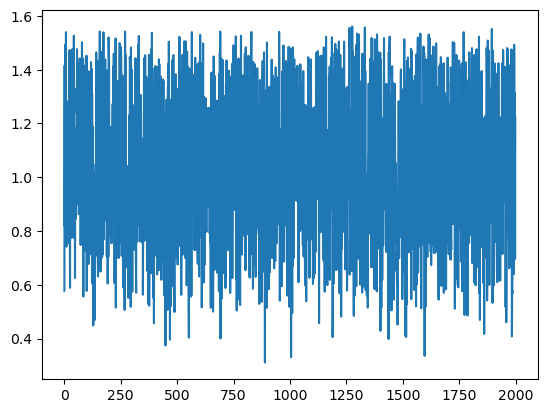

In [4]:
import matplotlib.pyplot as plt
# Visualize
plt.plot(y)
# plt.plot(y)
plt.show()

In [55]:
pip install torch-lr-finder

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/100 [00:00<?, ?it/s]

/Users/musa.official/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.46E-03


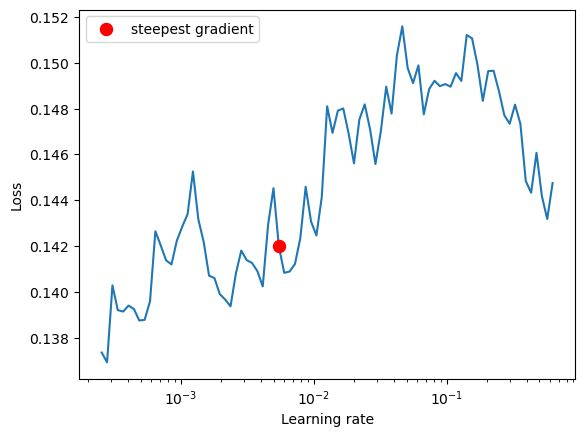

AttributeError: 'LRFinder' object has no attribute 'suggestion'

In [56]:
from torch.utils.data import DataLoader, TensorDataset
from torch_lr_finder import LRFinder

# Prepare your dataset
X = X_train
y = y_train
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32)

# Define your loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

# Initialize the LR finder
lr_finder = LRFinder(model, optimizer, criterion)

# Run the LR finder for a few epochs
lr_finder.range_test(dataloader, end_lr=1, num_iter=100)

# Plot the learning rate vs. loss
lr_finder.plot()

# Get the suggested learning rate
suggested_lr = lr_finder.suggestion()
print("Suggested LR:", suggested_lr)

# Clean up
lr_finder.reset()

In [3]:
y_train.shape

torch.Size([8000])

In [5]:
l.shape

torch.Size([])

In [16]:
l.item()

1.0539135932922363

In [ ]:
epoch:10,loss=1.129
epoch:20,loss=1.120
epoch:30,loss=1.111
epoch:40,loss=1.102
epoch:50,loss=1.094
epoch:60,loss=1.086
epoch:70,loss=1.077
epoch:80,loss=1.069
epoch:90,loss=1.062
epoch:100,loss=1.054

In [ ]:
epoch:10,loss=0.472
epoch:20,loss=0.332
epoch:30,loss=0.263
epoch:40,loss=0.215
epoch:50,loss=0.190